In [3]:
#Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm

from scipy import stats

from sklearn.preprocessing import MinMaxScaler

from   scipy.stats        import    chi2_contingency

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.model_selection import train_test_split, GridSearchCV

from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from collections import Counter
from imblearn.over_sampling import SMOTE 

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

In [8]:
df_new = pd.read_excel('Customer Churn Data.xlsx')

In [10]:
df_new.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df_new.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,Day_Since_CC_connect,cashback,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1,0.108108,1.0,0.054054,0.6,0.4,0.50,0.25,0.666667,1,...,0.344828,0.435907,0,1,0,0,0,0,1,1
1,1,0.000000,0.0,0.702703,0.4,0.6,0.25,0.50,0.416667,1,...,0.206897,0.462819,0,1,0,0,1,0,1,1
2,1,0.000000,1.0,0.297297,0.4,0.6,0.50,1.00,0.583333,0,...,0.206897,0.305089,0,1,0,0,1,0,1,1
3,1,0.000000,0.0,0.216216,0.4,0.4,0.25,1.00,0.166667,0,...,0.206897,0.282477,1,0,0,0,1,0,1,1
4,1,0.000000,0.0,0.486486,0.6,0.6,0.25,1.00,0.083333,1,...,0.482759,0.330989,0,1,0,0,0,0,1,0


 ## Splitting Data into Train and Test

In [12]:
# splitting data into independent and dependent variables
X = df_new.drop('Churn' , axis=1)

y = df_new.pop("Churn")

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y)

In [15]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7399, 21)
X_test (3171, 21)
y_train (7399,)
y_test (3171,)


In [110]:
def model_eval(model,xtrue,ytrue,ypred,probs):
    
    plot_roc_curve(model,xtrue,ytrue,color='red')
    plt.plot([0, 1], [0, 1], linestyle='--');
    
    print('Accuracy : ', model.score(xtrue, ytrue))
    
    plot_confusion_matrix(model,xtrue,ytrue, colorbar=False);
    
    print(classification_report(ytrue, ypred));

    # # calculate AUC
    auc = roc_auc_score(ytrue, probs)
    print('AUC: %.3f' % auc);

## ADA Booster

In [106]:
ADA = AdaBoostClassifier(n_estimators=51, random_state=1)
ADA = ADA.fit(X_train, y_train)

In [107]:
### Predicting on train and test dataset
ADA_ytrain_pred = ADA.predict(X_train)
ADA_ytest_pred = ADA.predict(X_test)

## Predicting probabilities on train dataset
ADA_trainprobs = ADA.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ADA_trainprobs = ADA_trainprobs[:, 1]

## Predicting probabilities on test dataset
ADA_testprobs = ADA.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ADA_testprobs = ADA_testprobs[:, 1]

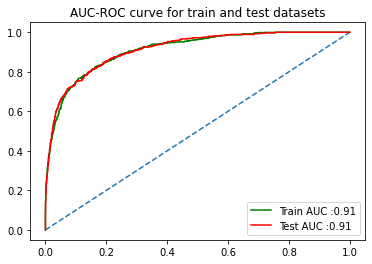

In [108]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ADA_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ADA_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ADA_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ADA_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8940397350993378
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6153
           1       0.74      0.57      0.65      1246

    accuracy                           0.89      7399
   macro avg       0.83      0.77      0.79      7399
weighted avg       0.89      0.89      0.89      7399

AUC: 0.912


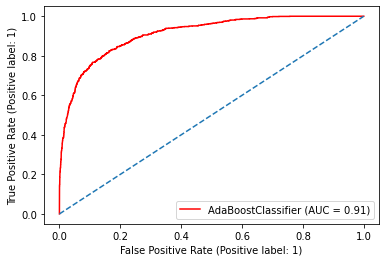

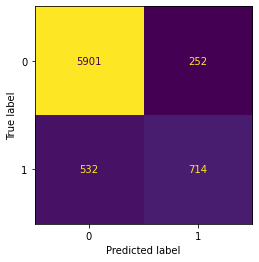

In [112]:
### Evaluation of training dataset
model_eval(ADA, X_train, y_train, ADA_ytrain_pred, ADA_trainprobs)

Accuracy :  0.9016083254493851
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2637
           1       0.76      0.61      0.68       534

    accuracy                           0.90      3171
   macro avg       0.84      0.79      0.81      3171
weighted avg       0.90      0.90      0.90      3171

AUC: 0.914


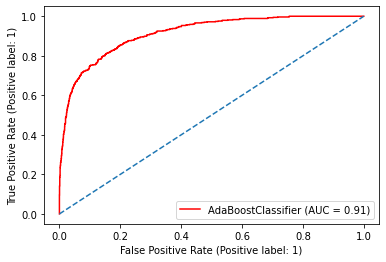

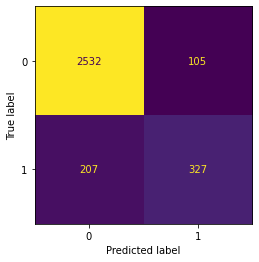

In [113]:
### Evaluation of test dataset
model_eval(ADA, X_test, y_test, ADA_ytest_pred, ADA_testprobs)

### Hypertuning of model

In [114]:
param_grid = {
    'algorithm': ['SAMME','SAMME.R'],
    'learning_rate': [1,2,3],
    'n_estimators': [51,101,151,201]
}

In [115]:
ADA_best = AdaBoostClassifier(random_state=0)

grid_search = GridSearchCV(estimator = ADA_best, param_grid = param_grid, cv = 5, scoring='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1, 2, 3],
                         'n_estimators': [51, 101, 151, 201]},
             scoring='f1')

In [116]:
grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 151}

In [117]:
grid_search.best_score_

0.6399769673073517

In [131]:
ADA_best = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate= 1, n_estimators= 151, random_state=123)
ADA_best.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=151, random_state=123)

In [132]:
### Predicting on train and test dataset
ADA_best_ytrain_pred = ADA_best.predict(X_train)
ADA_best_ytest_pred = ADA_best.predict(X_test)

## Predicting probabilities on train dataset
ADA_best_trainprobs = ADA_best.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ADA_best_trainprobs = ADA_best_trainprobs[:, 1]

## Predicting probabilities on test dataset
ADA_best_testprobs = ADA_best.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ADA_best_testprobs = ADA_best_testprobs[:, 1]

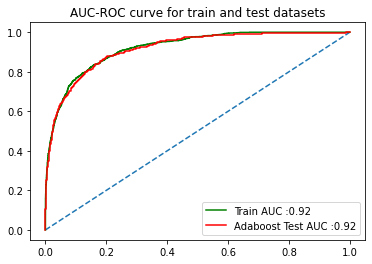

In [133]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ADA_best_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ADA_best_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_ada = 'Adaboost Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ADA_best_trainprobs)
fpr_test_ada, tpr_test_ada, thresholds_test_ada = roc_curve(y_test, ADA_best_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_ada, tpr_test_ada, color='red', label=test_label_ada)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8979591836734694
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6153
           1       0.76      0.58      0.66      1246

    accuracy                           0.90      7399
   macro avg       0.84      0.77      0.80      7399
weighted avg       0.89      0.90      0.89      7399

AUC: 0.921


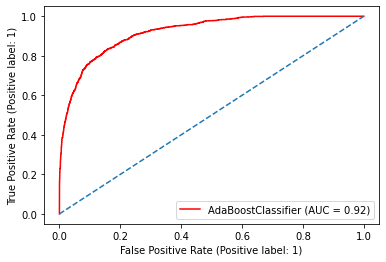

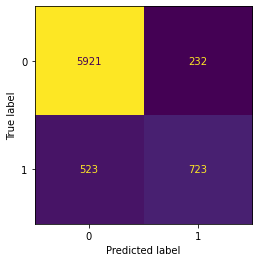

In [134]:
### Evaluation of training dataset
model_eval(ADA_best, X_train, y_train, ADA_best_ytrain_pred, ADA_best_trainprobs)

Accuracy :  0.8997161778618732
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2637
           1       0.75      0.60      0.67       534

    accuracy                           0.90      3171
   macro avg       0.84      0.78      0.80      3171
weighted avg       0.89      0.90      0.90      3171

AUC: 0.917


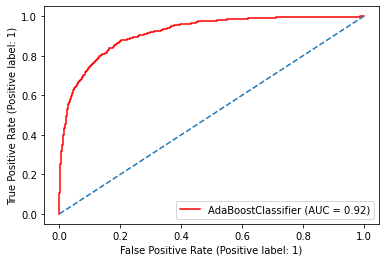

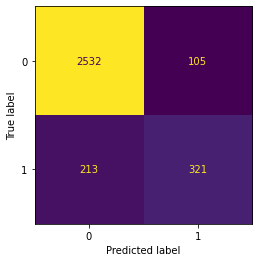

In [135]:
### Evaluation of test dataset
model_eval(ADA_best, X_test, y_test, ADA_best_ytest_pred, ADA_best_testprobs)

In [136]:
ADA_best.feature_importances_

array([0.21854305, 0.00662252, 0.0397351 , 0.01986755, 0.02649007,
       0.0397351 , 0.01986755, 0.05298013, 0.01986755, 0.07284768,
       0.01324503, 0.08609272, 0.28476821, 0.01324503, 0.01986755,
       0.01324503, 0.01324503, 0.00662252, 0.00662252, 0.01324503,
       0.01324503])

In [137]:
ADA_df = pd.DataFrame(ADA_best.feature_importances_, index=X.columns, columns=['Feature Importance'])
ADA_df

,Feature Importance
Tenure,0.218543
City_Tier,0.006623
CC_Contacted_LY,0.039735
Service_Score,0.019868
Account_user_count,0.026490
account_segment,0.039735
CC_Agent_Score,0.019868
rev_per_month,0.052980
Complain_ly,0.019868
rev_growth_yoy,0.072848


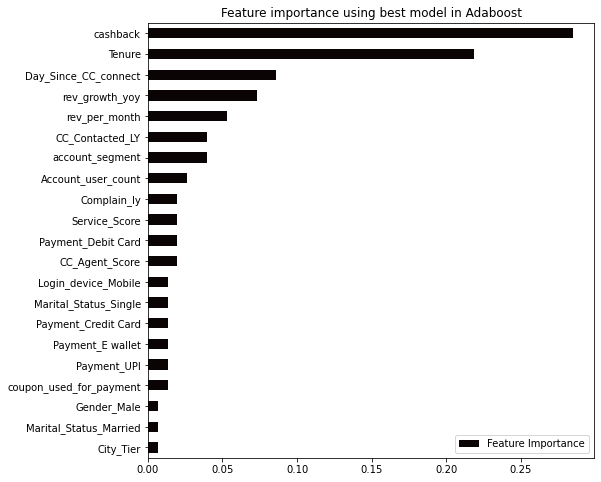

In [169]:
## plotting graph
imp_df = ADA_df.sort_values(by='Feature Importance')
imp_df.plot(kind='barh', cmap = 'mako', figsize=(8,8))
plt.title("Feature importance using best model in Adaboost")
plt.show();

In [139]:
## 5-fold cross validation on full data
ADA_cv = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate= 1, n_estimators= 201, random_state=123)
scores = cross_val_score(ADA_cv, X, y, cv=5, scoring='f1')
scores, scores.mean()

(array([0.59900166, 0.6599665 , 0.66973886, 0.64133739, 0.64222874]),
 0.642454630272882)

In [140]:
## 10-fold cross validation on full data
ADA_cv = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate= 1, n_estimators= 201, random_state=123)
scores = cross_val_score(ADA_cv, X, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.63843648, 0.65372168, 0.66449511, 0.64827586, 0.64353312,
        0.68656716, 0.63190184, 0.65680473, 0.69186047, 0.61919505]),
 0.6534791513990078)

## Support Vector Machine (SVM)

In [141]:
SVM = svm.SVC(random_state=1, probability=True)
SVM.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [142]:
SVM_ytrain_pred = SVM.predict(X_train)
SVM_ytest_pred = SVM.predict(X_test)

In [143]:
## Predicting probabilities on train dataset
SVM_trainprobs = SVM.predict_proba(X_train)
# # keep probabilities for the positive outcome only
SVM_trainprobs = SVM_trainprobs[:, 1]

## Predicting probabilities on test dataset
SVM_testprobs = SVM.predict_proba(X_test)
# # keep probabilities for the positive outcome only
SVM_testprobs = SVM_testprobs[:, 1]

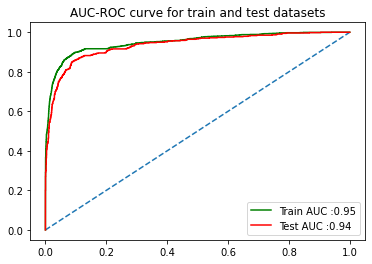

In [144]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train, SVM_trainprobs),2)
test_auc = round(roc_auc_score(y_test, SVM_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, SVM_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, SVM_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9199891877280714
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6153
           1       0.92      0.58      0.71      1246

    accuracy                           0.92      7399
   macro avg       0.92      0.78      0.83      7399
weighted avg       0.92      0.92      0.91      7399

AUC: 0.950


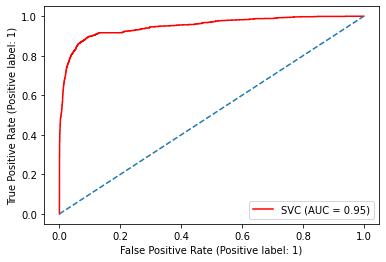

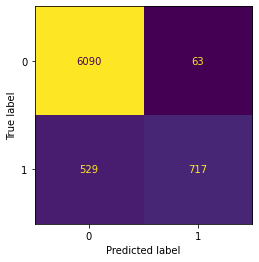

In [145]:
### Evaluation of training dataset
model_eval(SVM, X_train, y_train, SVM_ytrain_pred, SVM_trainprobs)

Accuracy :  0.9116997792494481
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2637
           1       0.89      0.54      0.68       534

    accuracy                           0.91      3171
   macro avg       0.90      0.77      0.81      3171
weighted avg       0.91      0.91      0.90      3171

AUC: 0.936


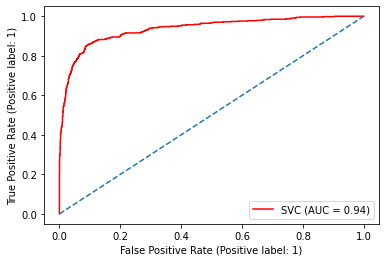

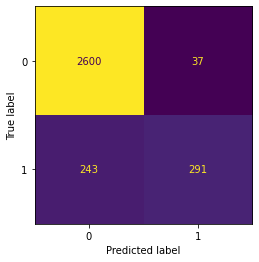

In [146]:
### Evaluation of test dataset
model_eval(SVM, X_test, y_test, SVM_ytest_pred, SVM_testprobs)

### Hypertuning the model

In [147]:
### Grid search 

grid={'C':[1,2,3,4,5,6,7,8,9],
      'kernel':['linear','poly','rbf','sigmoid'],
      'degree':[3,4,5],
      'gamma':['scale','auto'],
      'class_weight':['balanced','None'],
      'tol':[0.001,0.0001]
     }

In [148]:
model = svm.SVC(max_iter=2000,random_state=1)

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'C': 9, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.001} 

SVC(C=9, class_weight='balanced', max_iter=2000, random_state=1)


In [149]:
SVM_best = svm.SVC(C=9, class_weight='balanced', degree=5, gamma='scale', kernel='poly', tol=0.001, random_state=1, probability=True)
SVM_best = SVM_best.fit(X_train,y_train)

In [150]:
### Predicting on train and test dataset
SVM_best_ytrain_pred = SVM_best.predict(X_train)
SVM_best_ytest_pred = SVM_best.predict(X_test)

## Predicting probabilities on train dataset
SVM_best_trainprobs = SVM_best.predict_proba(X_train)
# # keep probabilities for the positive outcome only
SVM_best_trainprobs = SVM_best_trainprobs[:, 1]

## Predicting probabilities on test dataset
SVM_best_testprobs = SVM_best.predict_proba(X_test)
# # keep probabilities for the positive outcome only
SVM_best_testprobs = SVM_best_testprobs[:, 1]

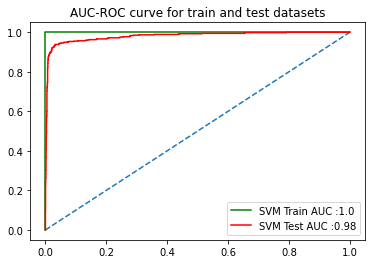

In [151]:
# # calculate roc AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, SVM_best_trainprobs),2)
test_auc = round(roc_auc_score(y_test, SVM_best_testprobs),2)
train_label_SVM = 'SVM Train AUC :' + str(train_auc)
test_label_SVM = 'SVM Test AUC :' + str(test_auc)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, SVM_best_trainprobs)
fpr_test_SVM, tpr_test_SVM, thresholds_test_SVM = roc_curve(y_test, SVM_best_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label_SVM)
plt.plot(fpr_test_SVM, tpr_test_SVM, color='red', label=test_label_SVM)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9982430058115962
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       0.99      1.00      0.99      1246

    accuracy                           1.00      7399
   macro avg       0.99      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


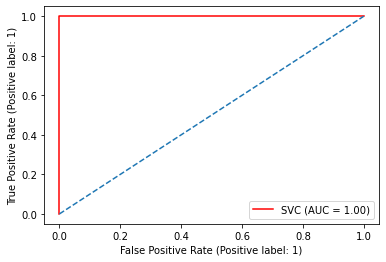

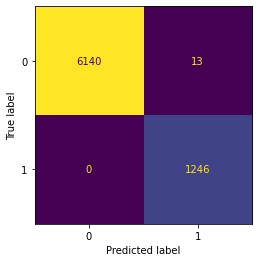

In [152]:
### Evaluation of training dataset
model_eval(SVM_best, X_train, y_train, SVM_best_ytrain_pred, SVM_best_trainprobs)

Accuracy :  0.967833491012299
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2637
           1       0.90      0.91      0.90       534

    accuracy                           0.97      3171
   macro avg       0.94      0.94      0.94      3171
weighted avg       0.97      0.97      0.97      3171

AUC: 0.981


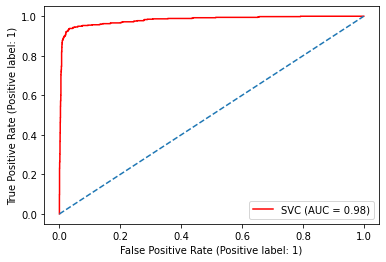

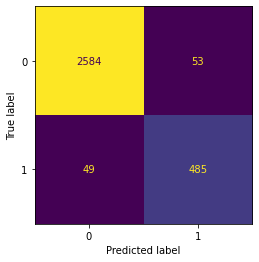

In [153]:
### Evaluation of test dataset
model_eval(SVM_best, X_test, y_test, SVM_best_ytest_pred, SVM_best_testprobs)

In [163]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(SVM_best, X_test, y_test)

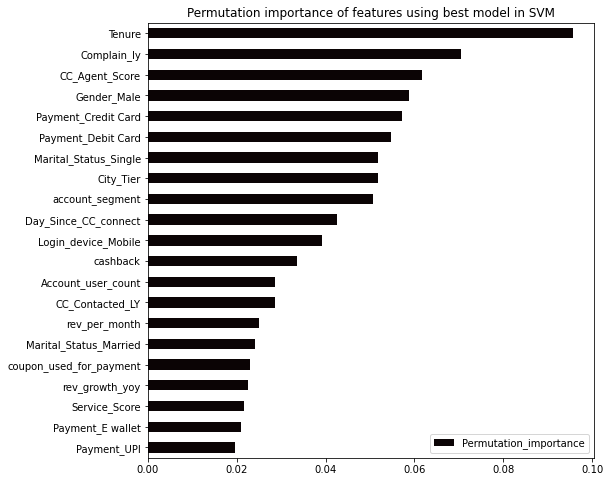

In [168]:
imp_df = pd.DataFrame(imps.importances_mean, columns=['Permutation_importance'], index = X.columns)
## plotting graph
imp_df = imp_df.sort_values(by='Permutation_importance')
imp_df.plot(kind='barh', cmap='mako', figsize=(8,8))
plt.title("Permutation importance of features using best model in SVM")
plt.show();

## Quadratic Discriminant Analysis (QDA)

In [154]:
QDA = QuadraticDiscriminantAnalysis()

In [155]:
QDA = QDA.fit(X_train, y_train)

In [156]:
### Predicting on train and test dataset

QDA_ytrain_pred = QDA.predict(X_train)
QDA_ytest_pred = QDA.predict(X_test)

## Predicting probabilities on train dataset
QDA_trainprobs = QDA.predict_proba(X_train)
# # keep probabilities for the positive outcome only
QDA_trainprobs = QDA_trainprobs[:, 1]

## Predicting probabilities on test dataset
QDA_testprobs = QDA.predict_proba(X_test)
# # keep probabilities for the positive outcome only
QDA_testprobs = QDA_testprobs[:, 1]


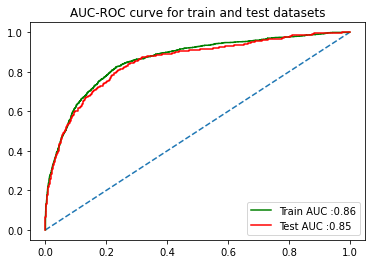

In [157]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train, QDA_trainprobs),2)
test_auc = round(roc_auc_score(y_test, QDA_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, QDA_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, QDA_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.857818624138397
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      6153
           1       0.58      0.57      0.57      1246

    accuracy                           0.86      7399
   macro avg       0.75      0.74      0.74      7399
weighted avg       0.86      0.86      0.86      7399

AUC: 0.860


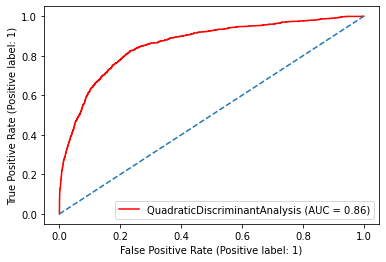

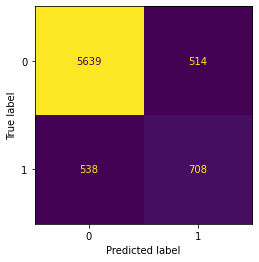

In [158]:
model_eval(QDA, X_train, y_train, QDA_ytrain_pred, QDA_trainprobs)

Accuracy :  0.8552507095553453
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2637
           1       0.57      0.55      0.56       534

    accuracy                           0.86      3171
   macro avg       0.74      0.73      0.74      3171
weighted avg       0.85      0.86      0.85      3171

AUC: 0.850


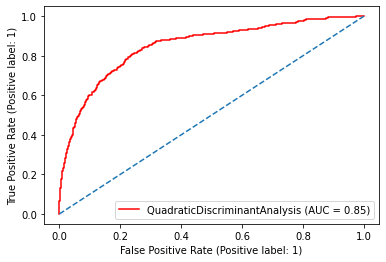

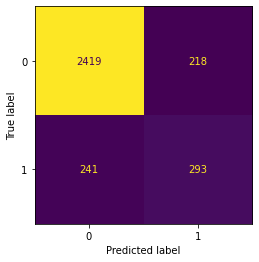

In [159]:
model_eval(QDA, X_test, y_test, QDA_ytest_pred, QDA_testprobs)

## END